In [9]:
library('igraph')
library('Matrix')
library('pracma')

In [10]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [7]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

### Homework Q2


In [150]:
random_walk_distance = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    shortest_paths = distances(g)
    
    v = start_node
    
    dist_vec = integer(num_steps)

    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        
        #get shortest distance
        dist = shortest_paths[start_node,v]
        dist_vec[i] = dist
    }
#     ret_list = list(dist_vec, v)
#     return(ret_list)
    return(dist_vec)
}

#### Part 1

[1] "degree:"
   [1] 10 16  8 10 10  9 12 11 11  8 12  9 15 10 12 12  7 10 12  3 15 11 10  6
  [25] 12  9 15 13  7 10 13  8 16  4  7  8 13 11 14  6  7 16 12  8  9 14 12 13
  [49] 11  7  9 11 13 12 12 13 10 11 10  6  9  6 15 14 12  5  8  6  4  6  9 14
  [73]  9 12 10 10 14 16 10  8 10  6 12  7 10 15  8 10 12 12 13  8 14 11  5 13
  [97] 14 12  5 12  9  9 12  3 12 10 15  8 12  9  3  8 13 11 11 14 11  5  7  9
 [121] 11  7  9  7 14 18 12  8  5  8  6 15 16 16  7  8 13 11  8  8 11  8 13  9
 [145] 13  9 15 13  7  6 10 12  5 14  6  9  5  9  7  9 12 18  8 11  8  9  7 11
 [169]  8  9 11 11  8  7  8  7 14  8  6  9 14 11 12  8  6  8 11 14 11  9 13  8
 [193]  7  7  8  7 14 10  5  9 15  9 11  9 11 12 10  8  6 14  6  6  8 15  7 13
 [217] 10 10 19  7  9  5  7 11  7  7 10  7  8  6 10  8  9  8  8  5 14 15 12  9
 [241]  7  5 11  8 10  9 12  9  8  7 10 16 10  9 11 11  8 11  6 11  9 11 10 10
 [265] 10  5 10  9 13  8 10 10  9  7 15 14 12 16  9  6 11  9 21 12  6 15 12 14
 [289] 15  7  7  7  6  6 15 11  8 11 1

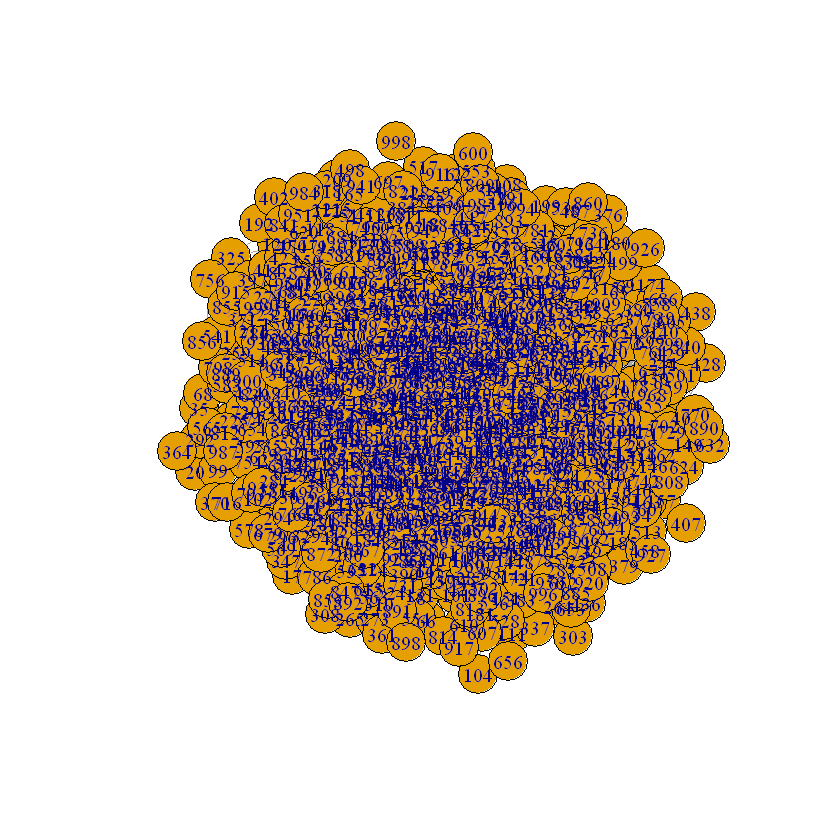

In [151]:
# set.seed(0)
graph_size = 1000
p = 0.01
g = sample_gnp(graph_size, p)
print('degree:')
print(degree(g))
print('degree distribution:')
print(degree_distribution(g))
print('diameter:')
print(diameter(g))
print('is connected:')
print(is_connected(g))
# print('clusters:')
# print(clusters(g))
plot(g)

 [1] 1.00 1.83 2.62 2.90 3.04 3.10 3.08 3.08 3.18 3.17 3.17 3.26 3.33 3.28 3.25
[16] 3.34 3.16 3.21 3.25 3.21 3.19 3.05 3.13 3.13 3.09 3.12 3.14 3.17 3.03 3.12
 [1] 0.000 0.354 0.920 1.330 0.734 0.740 0.810 0.654 0.918 0.534 0.594 0.430
[13] 0.418 0.374 0.410 5.880 2.808 1.950 1.670 0.706 0.594 0.610 0.594 0.878
[25] 0.538 0.504 0.590 0.542 0.494 0.552


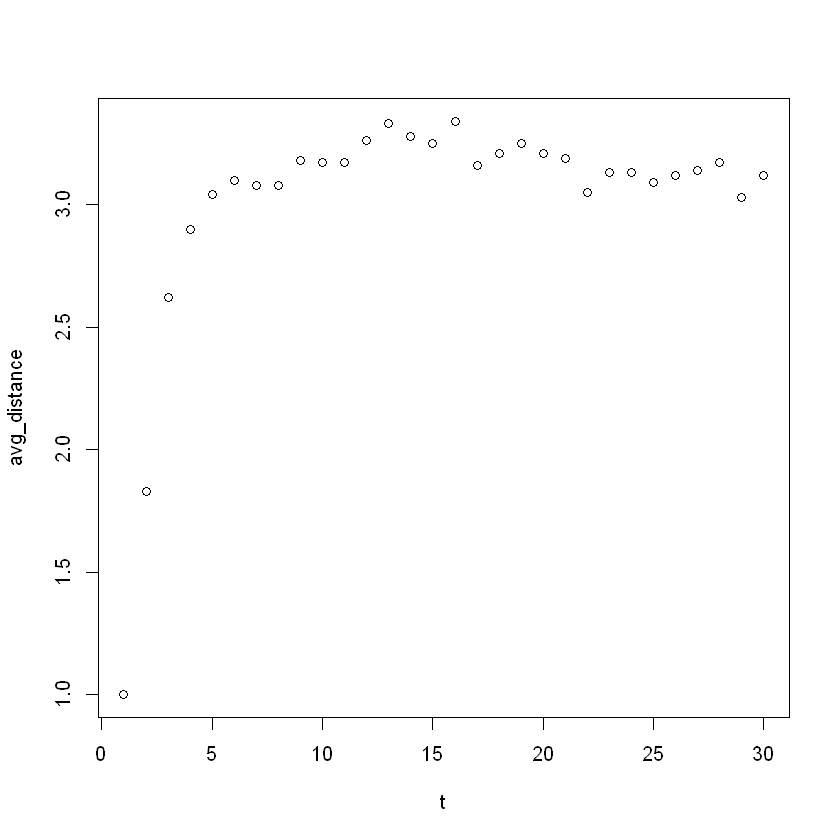

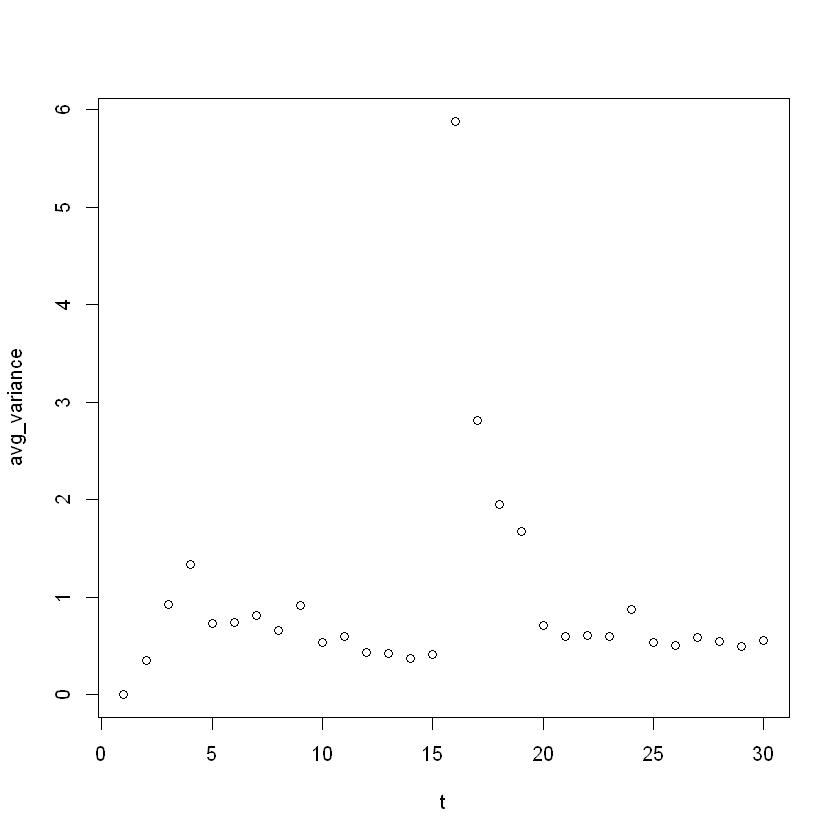

In [152]:
num_steps = 30
t = 1:num_steps

avg_dist_count_vec = integer(num_steps)
avg_var_count_vec = double(num_steps)

iter = 100

dist_vec_lst <- vector("list", iter)
last_v_lst = integer(iter)

for(i in 1:iter){
    rnd_start_node = sample(1:graph_size,1)
    dist_vec_lst[[i]] <- random_walk_distance(g, num_steps, rnd_start_node)
#     dist_vec_lst[[i]] = ret_lst[1]
#     last_v_lst[i] = ret_lst[2]
    avg_dist_count_vec = avg_dist_count_vec + dist_vec_lst[[i]]
}

#calculate average distance
avg_distance = avg_dist_count_vec / iter
print(avg_distance)
plot(t,avg_distance)

for(i in 1:iter){
    avg_var_count_vec = avg_var_count_vec + (dist_vec_lst[[i]] - avg_dist_vec)^2
}

#calculate average variance
avg_variance = avg_var_count_vec / iter
print(avg_variance)
plot(t,avg_variance)

In [159]:
#get degree distribution at end of random walk
# degree_dist_nodes = lapply(dist_vec_lst, tail, n=1L, FUN.VALUE = numeric(1))
# print(degree_dist_nodes)
# degree(g,v=)

#### Part 2


[1] "degree:"
   [1] 31 62 25 15  6  3  7 38  2  5 17 12  6  7  3 14  6 26 11  2  2  6  8 20
  [25]  4  2  8  5 14  4  2  2  2  1  2  3  1  3  2  4  6  1  8  7  2  2  2  3
  [49]  2  2  8  3  1  7  3  1  1  3  9  2  6  1 14  1  1  2 11  7  2  6  4  1
  [73]  4  6  6  2  9  3  5  3  2  5  4  1  1  1  1  2  4  1  4  1  1  3  4  2
  [97]  1  3  1  1  1  3  1  1  3  2  2  6  4  4  1  1  1  1  1  7  6  4  8  3
 [121]  5  6  2  1  1  6  2  2  2  5  1  1  2  1  5  3  2  1  5  1  3  2  5  4
 [145]  1  5  1  4  1  3  2  2  3  3  3  5  5  4  5  2  3  1  3  6  5  1  1  4
 [169]  1  2  1  1  1  1  1  3  1  3  5  3  1  1  2  4  2  1  1  2  4  5  7  5
 [193]  1  1  3  1  2  2  1  1  1  3  1  1  2 11  3  1  3  1  4  2  1  4  1  1
 [217]  6  1  2  2  1  1  3  2  4  3  2  3  2  1  1  2  6  1  2  1  3  3  1  3
 [241]  2  1  1  1  2  1  1  4  2  2  1  2  6  1  1  2  2  2  7  1  1  1  1  1
 [265]  2  1  1  1  1  4  1  1  1  1  1  2  7  2  1  1  1  2  1  1  1  3  1  3
 [289]  2  2  1  3  1  1  7  3  4  2  

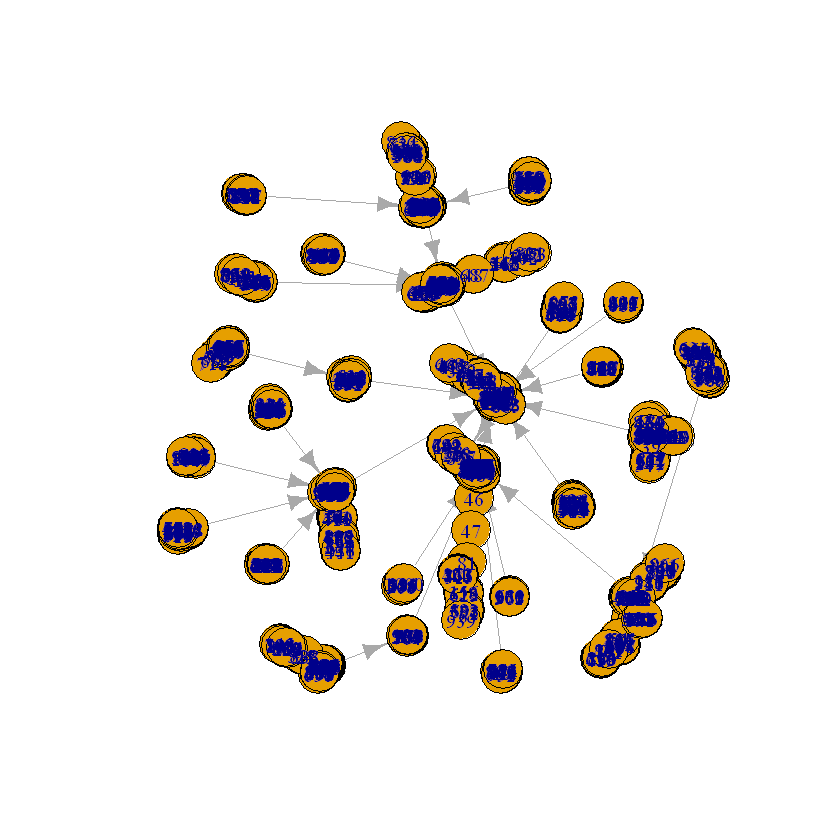

In [156]:
# set.seed(0)
g = sample_pa_age(1000, pa.exp=1, aging.exp=0, m=1)
plot(g)
print('degree:')
print(degree(g))
print('degree distribution:')
print(degree_distribution(g))
print('sample gnp:')
# print(sample_gnp(g))
print('diameter:')
print(diameter(g))
print('is connected:')
print(is_connected(g))
print('clusters:')
# print(clusters(g))
# print(create_transition_matrix(g))

 [1] 1.00 1.99 2.74 3.20 3.48 3.63 3.69 3.69 3.69 3.69 3.69 3.69 3.69 3.69 3.69
[16] 3.69 3.69 3.69 3.69 3.69 3.69 3.69 3.69 3.69 3.69 3.69 3.69 3.69 3.69 3.69
 [1] 0.000 0.162 0.760 1.910 1.958 2.118 2.310 2.622 2.274 2.358 2.358 2.310
[13] 2.514 2.622 2.514 9.510 6.642 5.130 4.802 3.254 2.514 2.310 2.622 2.274
[25] 2.358 2.358 2.310 2.514 2.622 2.514


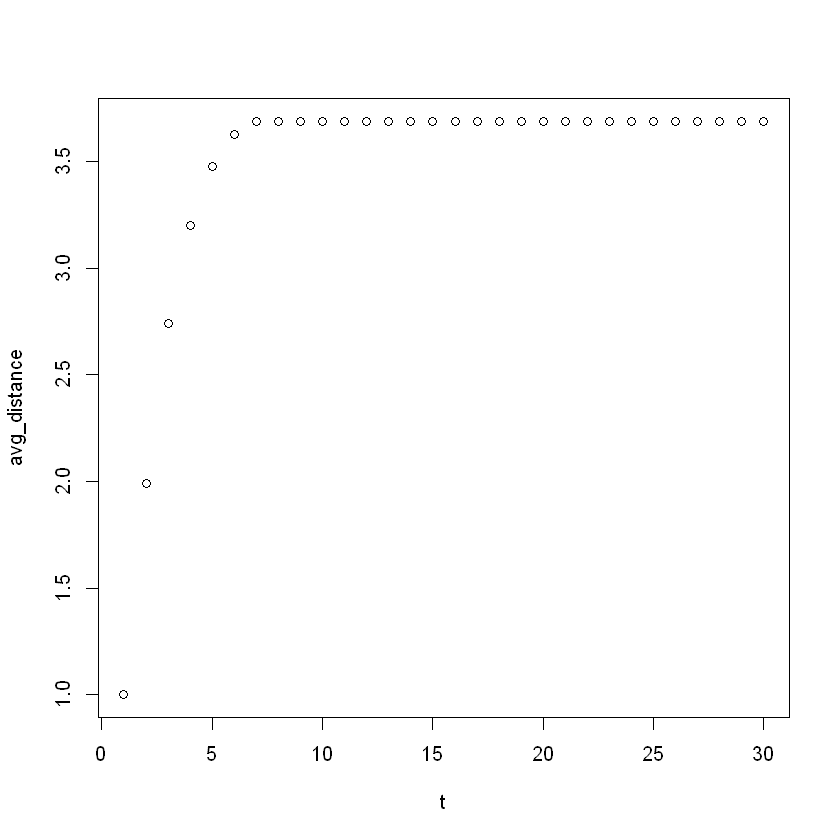

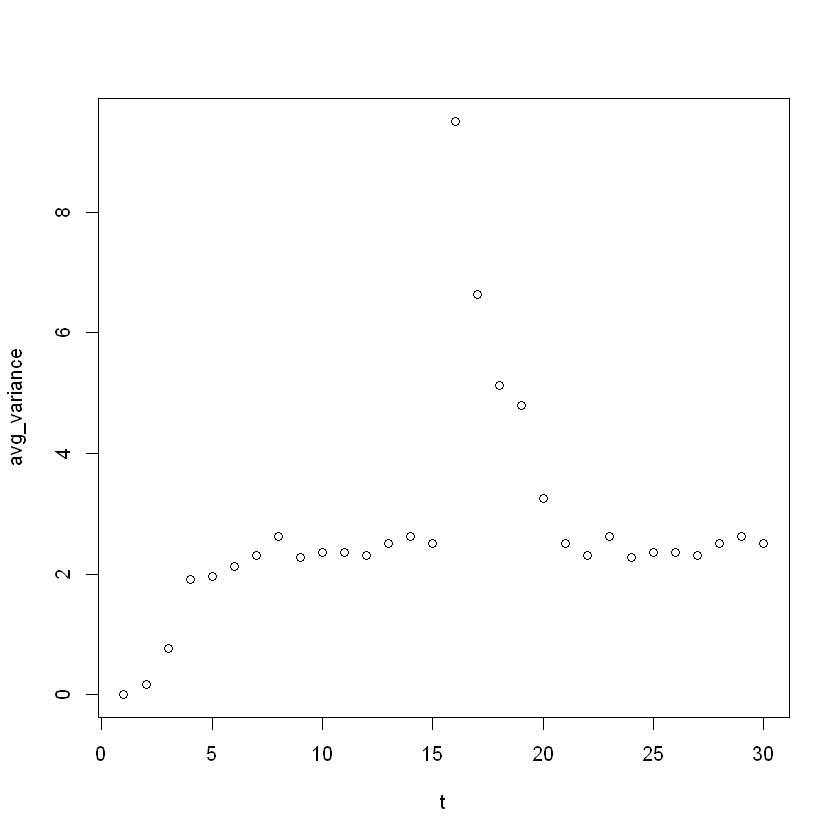

In [157]:
num_steps = 30
t = 1:num_steps

avg_dist_count_vec = integer(num_steps)
avg_var_count_vec = double(num_steps)

iter = 100

dist_vec_lst <- vector("list", iter)
last_v_lst = integer(iter)

for(i in 1:iter){
    rnd_start_node = sample(1:graph_size,1)
    dist_vec_lst[[i]] <- random_walk_distance(g, num_steps, rnd_start_node)
#     dist_vec_lst[[i]] = ret_lst[1]
#     last_v_lst[i] = ret_lst[2]
    avg_dist_count_vec = avg_dist_count_vec + dist_vec_lst[[i]]
}

#calculate average distance
avg_distance = avg_dist_count_vec / iter
print(avg_distance)
plot(t,avg_distance)

for(i in 1:iter){
    avg_var_count_vec = avg_var_count_vec + (dist_vec_lst[[i]] - avg_dist_vec)^2
}

#calculate average variance
avg_variance = avg_var_count_vec / iter
print(avg_variance)
plot(t,avg_variance)